# **Preprocessing Data**
**Oleh:** Benony Gabriel (NIM: 105222002)<br><br>
**Preprocessing yang dilakukan disini antara lain:**
- Mengatasi Noise (membuat data tidak konsisten menjadi konsisten)
- Mengisi Missing Values<br><br>

**Dataset:** Volume Pengangkutan Sampah <br>
**Deskripsi Dataset:** <br>
Berikut ini adalah penjelasan singkat terkait variabel data / kolom dari dataset sampah:  
1. bulan : Bulan  
2. titik_lokasi : Titik Lokasi Penampungan Sampah  
3. kecamatan : Kecamatan dimana titik lokasi penampungan sampah berada  
4. wilayah : Wilayah dimana titik lokasi penampungan sampah berada  
5. panjang/luas : Panjang atau luas area penanganan sampah  
6. satuan : Satuan Panjang atau Luas  
7. tanggal : Tanggal  
8. volume_sampah_perhari (m3) : Volume Sampah per Hari (dengan satuan m3)  

# **Langkah-Langkah:**

### 1. Mengimpor Library dan Memuat Data
Langkah pertama adalah mengimpor Library Python yang relevan, seperti:
- **Pandas**: untuk memproses dan menganalisis data.
- **Matplotlib** dan **Seaborn**: untuk membuat visualisasi grafik.

In [1]:
# Impor Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

#Untuk menampilkan semua kolom sampai 200
pd.set_option('display.max_columns', 200) 

# Mengatur gaya plot untuk visualisasi yang konsisten
plt.style.use('ggplot')

In [2]:
# Memuat dataset
file_path = 'datasets/volume-pengangkutan-sampah.csv'
df = pd.read_csv(file_path)

### 2. Data Understanding
Melakukan pemeriksaan awal:
- **`df.shape`**: Menampilkan jumlah kolom dan baris.
- **`df.info()`**: Menampilkan informasi tentang jumlah kolom, baris, tipe data, dan apakah ada nilai yang hilang.
- **`df.head()`**: Menampilkan beberapa baris pertama untuk melihat bagaimana data tersusun.
- **`df.dtypes`**: Menunjukkan tipe data (data types) dari setiap kolom dalam sebuah DataFrame Pandas.
- **`df.describe()`**: Adalah metode Pandas yang memberikan statistik deskriptif dari kolom numerik dan, dengan beberapa parameter tambahan, juga bisa memberikan statistik deskriptif dari kolom kategorikal.

In [3]:
# Melihat banyak baris dan kolom dalam dataset
df.shape

(54343, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      54343 non-null  int64 
 1    titik_lokasi              54343 non-null  object
 2    kecamatan                 54343 non-null  object
 3    wilayah                   54343 non-null  object
 4    panjang/luas              53475 non-null  object
 5   satuan_panjang/luas        32388 non-null  object
 6   tanggal                    54343 non-null  int64 
 7   volume_sampah_perhari(m3)  54343 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [5]:
df.head(15)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,Johar Baru,Jakarta Pusat,464,m,1,4
1,1,Kali / Sungai Sentiong - Ruas Abapon,Johar Baru,Jakarta Pusat,464,m,1,4
2,1,Kali / Sungai Sentiong - JL Tanah Tinggi,Johar Baru,Jakarta Pusat,464,m,1,4
3,1,Kali / Sungai Sentiong Jl.Galur - Pombensin,Johar Baru,Jakarta Pusat,606,m,1,4
4,1,Kali / Sungai Sentiong - Jl. Timah,Johar Baru,Jakarta Pusat,310,m,1,7
5,1,PHB Kawi Kawi Bawah,Johar Baru,Jakarta Pusat,620,m,1,1
6,1,PHB Kayu Awet,Johar Baru,Jakarta Pusat,300,m,1,12
7,1,PHB Pulo Gundul,Johar Baru,Jakarta Pusat,500,m,1,1
8,1,PHB Tanah Tinggi XII,Johar Baru,Jakarta Pusat,500,m,1,1
9,1,PHB Bala Dewa,Johar Baru,Jakarta Pusat,330,m,1,1


In [6]:
df.dtypes

bulan                         int64
 titik_lokasi                object
 kecamatan                   object
 wilayah                     object
 panjang/luas                object
satuan_panjang/luas          object
tanggal                       int64
volume_sampah_perhari(m3)    object
dtype: object

In [7]:
df.describe()

,bulan,tanggal
count,54343.0,54343.000000
mean,1.0,16.000000
std,0.0,8.944354
min,1.0,1.000000
25%,1.0,8.000000
50%,1.0,16.000000
75%,1.0,24.000000
max,1.0,31.000000


### 3. Pembersihan dan Konsistensi Data

**Step 1:** Merapihkan kolom <br>
Ada spasi tambahan di beberapa nama kolom, seperti " titik_lokasi", " kecamatan", dll. Saya akan membersihkannya agar konsisten

- **Asumsi 1:** Semua data dalam kolom **`Panjang/Luas`** akan dikonversi menjadi nilai luas (m²). Jika data awal berisi panjang, maka akan diasumsikan panjang tersebut mewakili luas sehingga hasil konversinya berupa luas dalam satuan meter persegi.
- **Asumsi 2:** Semua data dalam kolom **`Satuan_Panjang/Luas`** akan diabaikan atau dihapus karena sudah diintegrasikan ke dalam satuan m² berdasarkan **Asumsi 1**, sehingga kolom ini tidak lagi diperlukan.

In [8]:
df.columns

Index(['bulan', ' titik_lokasi', ' kecamatan', ' wilayah', ' panjang/luas',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [9]:
# Rename kolom dan merapihkannya (Kode untuk Asumsi 1)
df = df.rename(columns={'bulan':'Bulan', 
                        ' titik_lokasi':'Titik_Lokasi', 
                        ' kecamatan':'Kecamatan', 
                        ' wilayah':'Wilayah', 
                        ' panjang/luas':'Luas(m2)',
                        'satuan_panjang/luas':'Satuan_Panjang_Luas', 
                        'tanggal':'Tanggal', 
                        'volume_sampah_perhari(m3)':'Volume_Sampah_Perhari(m3)'})

In [10]:
df.columns

Index(['Bulan', 'Titik_Lokasi', 'Kecamatan', 'Wilayah', 'Luas(m2)',
       'Satuan_Panjang_Luas', 'Tanggal', 'Volume_Sampah_Perhari(m3)'],
      dtype='object')

In [11]:
# kode untuk Asumsi 2
df.drop(['Satuan_Panjang_Luas'], axis=1, inplace=True)

In [12]:
df.dtypes

Bulan                         int64
Titik_Lokasi                 object
Kecamatan                    object
Wilayah                      object
Luas(m2)                     object
Tanggal                       int64
Volume_Sampah_Perhari(m3)    object
dtype: object

**Step 2:** Mengganti tipe data yang tidak sesuai<br>
Dari tipe data yang terlihat di atas, tampak ada beberapa ketidaksesuaian pada tipe data kolom-kolom tersebut, seperti: <br>
- **`Luas(m2) (object)`** : Kolom ini tidak sesuai karena seharusnya berisi angka (baik panjang maupun luas), jadi sebaiknya diubah menjadi **float64**. Tipe **object** menunjukkan mungkin ada teks yang mengacaukan nilai numeriknya. Kita perlu memastikan bahwa hanya angka yang ada di kolom ini.
- **`Volume_Sampah_Perhari(m3) (object)`** : Kolom ini seharusnya berisi angka yang mewakili volume sampah, sehingga sebaiknya diubah menjadi **float64**. Tipe **object** menunjukkan mungkin ada noise seperti string atau simbol lain di dalam kolom ini. <br>

<br>Berikut ini saya akan menggantinya ke tipe data yang sesuai

In [13]:
df['Luas(m2)'] = pd.to_numeric(df['Luas(m2)'], errors='coerce')  # Mengubah ke float, invalid values jadi NaN
df['Volume_Sampah_Perhari(m3)'] = pd.to_numeric(df['Volume_Sampah_Perhari(m3)'], errors='coerce')  # Mengubah ke float

# Melihat perubahan tipe data
df.dtypes

Bulan                          int64
Titik_Lokasi                  object
Kecamatan                     object
Wilayah                       object
Luas(m2)                     float64
Tanggal                        int64
Volume_Sampah_Perhari(m3)    float64
dtype: object

### 4. Mengatasi Missing Values
Berikut adalah tahapan yang dilakukan untuk mengecek dan mengisi missing values dalam dataset:
1. **Cek Missing Values di Dataset:** Langkah pertama adalah mengecek jumlah missing values (NaN) di setiap kolom. Dapat dilakukan dengan fungsi `df.isna().sum()`
2. **Analisis Kolom dengan Missing Values:** Setelah mengetahui kolom mana yang memiliki missing values, kita harus melakukan analisis terhadap kolom tersebut:
   - Apakah missing values dalam jumlah besar atau kecil?
   - Seberapa penting kolom tersebut untuk analisis?
   - Bagaimana distribusi data pada kolom tersebut? Apakah datanya numerik atau kategori?
3. **Tentukan Strategi Penanganan Missing Values:** Berdasarkan analisis, tentukan strategi yang paling tepat untuk mengisi missing values. Beberapa opsi yang dapat dipilih:
   - **Untuk Data Numerik:**
     - Rata-rata (mean): Cocok digunakan jika distribusi data cukup normal (tidak banyak outlier).
     - Median: Jika data mengandung outlier yang signifikan, median lebih baik digunakan daripada mean.
     - Mode: Menggunakan nilai yang paling sering muncul dalam data, cocok jika datanya cenderung bernilai tetap.
   - **Untuk Data Kategori:**
     - Mode: Mengisi dengan nilai yang paling sering muncul dalam kolom tersebut.
     - Menggunakan nilai khusus: Mengisi dengan kategori seperti "Tidak diketahui" atau "Lainnya".
4. **Menghapus Baris atau Kolom dengan Missing Values (Opsional):** Jika missing values terlalu banyak dan pengisian dengan nilai lain tidak relevan, kita bisa menghapus baris atau kolom yang mengandung missing values.
5. **Verifikasi Pengisian Missing Values:** Setelah mengisi atau menghapus missing values, lakukan pengecekan ulang untuk memastikan tidak ada missing values yang tersisa `df.isna().sum()`. Jika semua missing values telah terisi atau dihapus, jumlah missing values akan menjadi 0.
6. **Simpan Dataset yang Telah Dibersihkan:** Setelah semua langkah selesai, jangan lupa untuk menyimpan dataset yang sudah dibersihkan: `df.to_csv('dataset_bersih.csv', index=False)` <br><br>
 

**Step 1:** Cek Missing Values di Dataset

In [14]:
df.isna().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Luas(m2)                     13299
Tanggal                          0
Volume_Sampah_Perhari(m3)    17703
dtype: int64

Berdasarkan hasil pengecekan missing values diatas, terdapat dua kolom dengan missing values:

- **Luas(m2):** 13.299 missing values
- **Volume_Sampah_Perhari(m3):** 17.703 missing values

**Step 2:** Mengecek Outliers <br>
Sebelum mengisi missing values, penting untuk mengecek apakah terdapat outliers (nilai ekstrem) dalam data. Outliers dapat memengaruhi hasil pengisian missing values, terutama jika kita berencana menggunakan metode seperti mean atau median.

1. Mengecek Outliers dengan visualisasi Boxplot terhadap kolom yang memiliki missing values. **Boxplot** adalah cara visual yang cepat untuk mendeteksi outliers. Nilai-nilai yang berada di luar whiskers dari boxplot biasanya dianggap sebagai outliers.

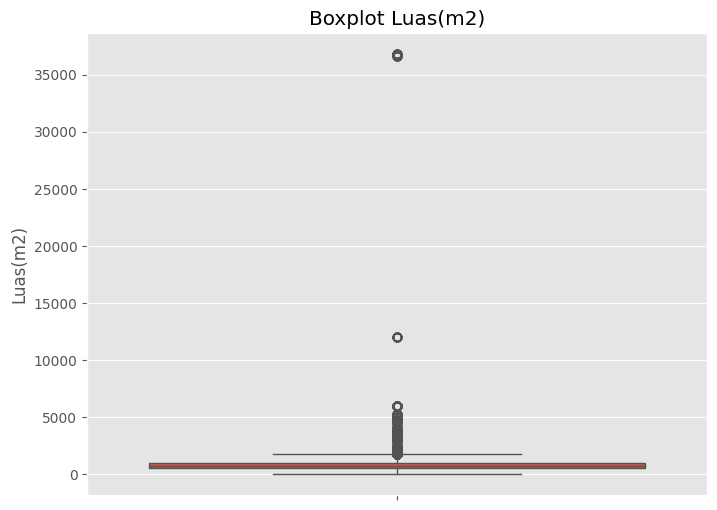

In [15]:
# Boxplot untuk kolom 'Luas(m2)'
plt.figure(figsize=(8, 6))
sns.boxplot(df['Luas(m2)'])
plt.title('Boxplot Luas(m2)')
plt.show()

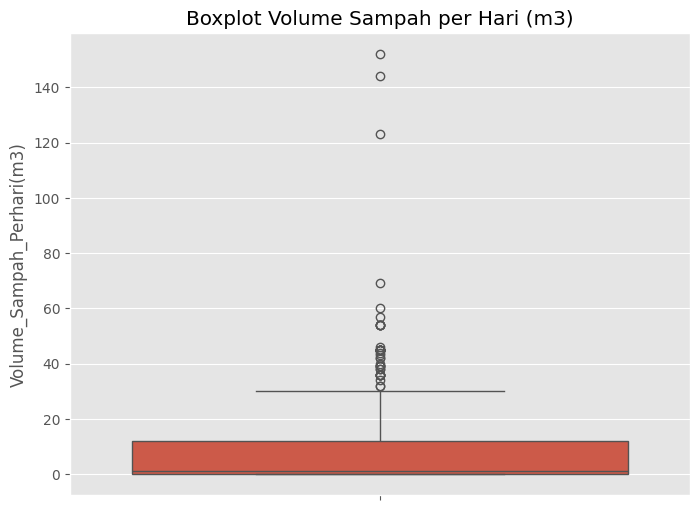

In [16]:
# Boxplot untuk kolom 'Volume_Sampah_Perhari(m3)'
plt.figure(figsize=(8, 6))
sns.boxplot(df['Volume_Sampah_Perhari(m3)'])
plt.title('Boxplot Volume Sampah per Hari (m3)')
plt.show()

2. Dari visualisasi diatas kita melihat bahwa terdapat outliers pada kedua kolom tersebut. Sekarang saya akan menggunakan teknik **IQR (Interquartile Range)** untuk mendeteksi outliers. Nilai yang berada di luar rentang 1.5 kali IQR dari kuartil pertama (Q1) atau kuartil ketiga (Q3) dianggap outliers.

In [17]:
# Menghitung IQR untuk kolom 'Luas(m2)'
Q1 = df['Luas(m2)'].quantile(0.25)
Q3 = df['Luas(m2)'].quantile(0.75)
IQR = Q3 - Q1

# Mendeteksi outliers
outliers_luas = df[(df['Luas(m2)'] < (Q1 - 1.5 * IQR)) | (df['Luas(m2)'] > (Q3 + 1.5 * IQR))]

print(outliers_luas)

# Menghitung IQR untuk kolom 'Volume_Sampah_Perhari(m3)'
Q1 = df['Volume_Sampah_Perhari(m3)'].quantile(0.25)
Q3 = df['Volume_Sampah_Perhari(m3)'].quantile(0.75)
IQR = Q3 - Q1

# Mendeteksi outliers
outliers_volume = df[(df['Volume_Sampah_Perhari(m3)'] < (Q1 - 1.5 * IQR)) | (df['Volume_Sampah_Perhari(m3)'] > (Q3 + 1.5 * IQR))]

print(outliers_volume)

       Bulan                                       Titik_Lokasi    Kecamatan  \
28         1                Kali / Sungai Ciliwung Ruas Veteran       Gambir   
72         1  Kali / Sungai Ciliwung Emplasement PA Manggara...      Menteng   
103        1    Kali / Sungai Ciragil Jembatan Hotel Park Royal  Tanah Abang   
111        1                                    PHB Abdul Jalil  Tanah Abang   
112        1                                   PHB Kampung Bali  Tanah Abang   
...      ...                                                ...          ...   
54106      1                                          PHB Gardu  Kramat Jati   
54130      1                                  PHB Cipinang Jaya   Jatinegara   
54136      1                                       PHB SMAN 100   Jatinegara   
54150      1        Kali Baru Timur Cawang Kompor - Kebon Nanas   Jatinegara   
54155      1         Kali Baru Timur Jembatan Hitam-Jl. Bunga I     Matraman   

             Wilayah  Luas(m2)  Tanggal

**Step 3:** Mengisi Missing Values : Dikarenakan distribusi data cukup normal (tidak banyak outlier) maka saya akan mengisi missing values menggunakan teknik **Mean (Rata-rata)**.

1. Mengisi missing values di kolom **Luas(m2)** dengan **Mean**:

In [ ]:
df['Luas(m2)'].fillna(df['Luas(m2)'].mean(), inplace=True)

In [19]:
# Cek ulang
df.isna().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Luas(m2)                         0
Tanggal                          0
Volume_Sampah_Perhari(m3)    17703
dtype: int64

2. Mengisi missing values di kolom **Volume_Sampah_Perhari(m3)** dengan **Median** dikarenakan data tidak terdistribusi secara normal atau terdapat banyak outlier.

In [20]:
df.fillna({'Volume_Sampah_Perhari(m3)': df['Volume_Sampah_Perhari(m3)'].median()}, inplace=True)

In [21]:
# Cek ulang
df.isna().sum()

Bulan                        0
Titik_Lokasi                 0
Kecamatan                    0
Wilayah                      0
Luas(m2)                     0
Tanggal                      0
Volume_Sampah_Perhari(m3)    0
dtype: int64

**Step 4:** Verifikasi Distribusi Data Setelah Pengisian

Setelah mengisi missing values, sebaiknya kita memverifikasi distribusi data untuk memastikan pengisian yang dilakukan tidak menyebabkan data menjadi tidak akurat atau tidak wajar. Kita bisa menggunakan metode visualisasi seperti histogram:

<Axes: >

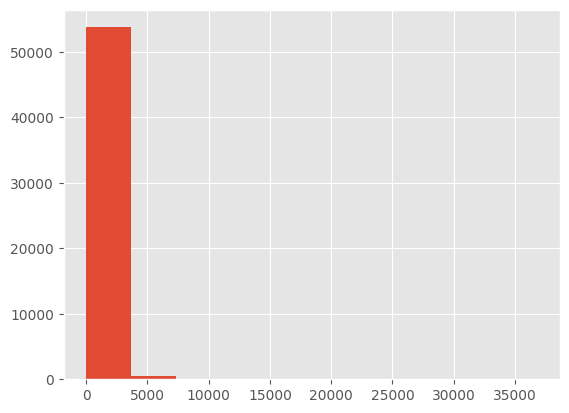

In [22]:
df['Luas(m2)'].hist()

<Axes: >

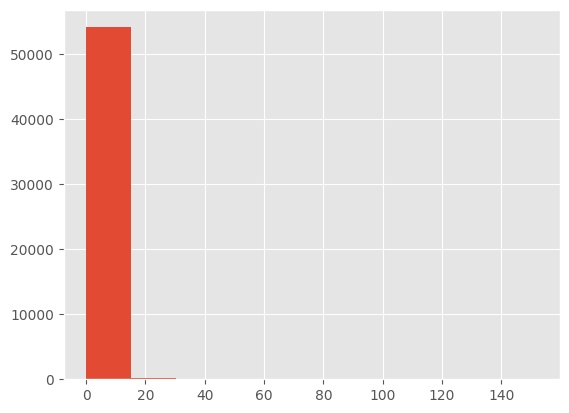

In [23]:
df['Volume_Sampah_Perhari(m3)'].hist()

### 5. Simpan Dataset yang Sudah Bersih

Jika semua missing values telah terisi dan datanya sudah sesuai, kita bisa menyimpan dataset yang telah bersih:

In [24]:
df.to_csv('dataset_bersih.csv', index=False)

Dengan tahapan ini, kita akan berhasil menangani missing values pada kolom Luas(m2) dan Volume_Sampah_Perhari(m3) secara efektif.

# Selesai